In [1]:
import pandas as pd
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dtflowers = pd.read_csv("/Machine Learning/Data/IRIS.csv")
#se muestra el dataframe
dtflowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Se reemplazará el valor de las especies de flores, donde 0 corresponde a setosa, 1 a virginica y 2 a versicolor
dtflowers=dtflowers.replace(to_replace ="Iris-setosa", value ="0")
dtflowers=dtflowers.replace(to_replace ="Iris-virginica", value ="1")
dtflowers=dtflowers.replace(to_replace ="Iris-versicolor", value ="2")

In [3]:
#permite mostrar el nombre de las columnas 
col_names=dtflowers.columns
col_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
dtflowers.columns=dtflowers.columns.str.strip()

In [5]:
dtflowers.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#Se renombra la columna specie por target_class, las demás columnas quedan iguales.
dtflowers.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target_class']

In [7]:
#Se muestran las columnas con los nombres actualizados.
dtflowers.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
dtflowers.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'target_class'],
      dtype='object')

In [9]:
#Se visualizan el número de especies por cada clase de flores
dtflowers['target_class'].value_counts()

0    50
2    50
1    50
Name: target_class, dtype: int64

In [10]:
import numpy as np
dtflowers['target_class'].value_counts()/np.float(len(dtflowers))

C:\Users\jegjo\AppData\Local\Temp/ipykernel_9668/1748107915.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtflowers['target_class'].value_counts()/np.float(len(dtflowers))


0    0.333333
2    0.333333
1    0.333333
Name: target_class, dtype: float64

In [11]:
#Permite viusalizar información del dataframe
dtflowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [12]:
#Se muestran los datos vacios o nulos en el dataframe
dtflowers.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

In [13]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dtflowers.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Text(0, 0.5, 'petal_width')

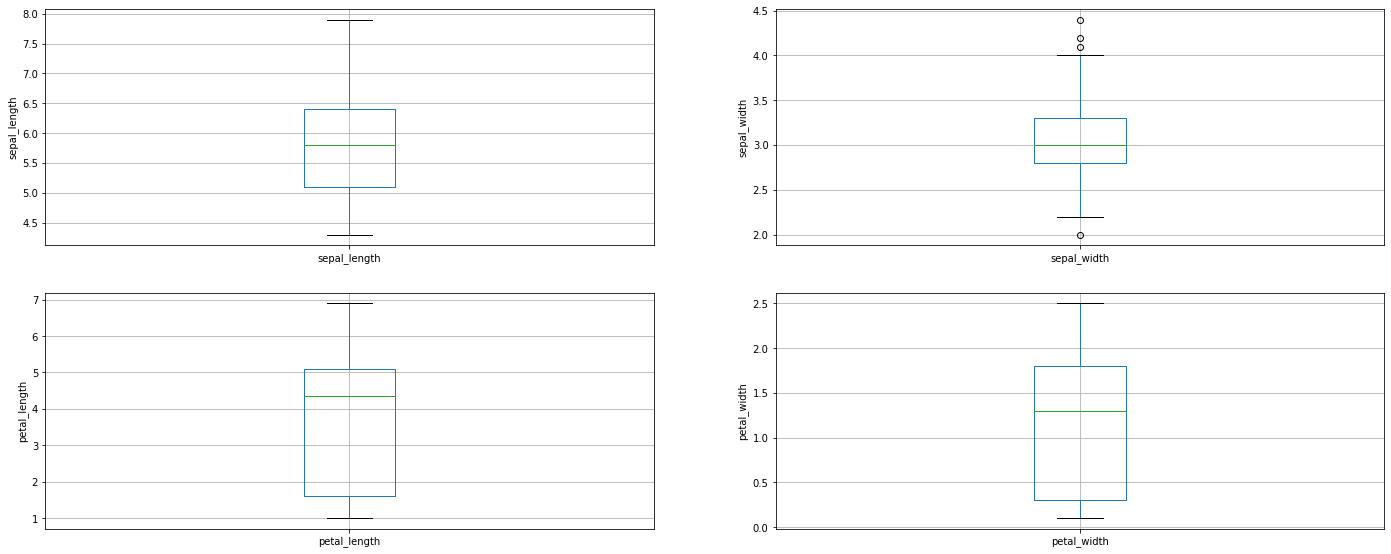

In [14]:
# se muestran en figuras los valores atípicos
import matplotlib.pyplot as plt
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dtflowers.boxplot(column='sepal_length')
fig.set_title('')
fig.set_ylabel('sepal_length')


plt.subplot(4, 2, 2)
fig = dtflowers.boxplot(column='sepal_width')
fig.set_title('')
fig.set_ylabel('sepal_width')


plt.subplot(4, 2, 3)
fig = dtflowers.boxplot(column='petal_length')
fig.set_title('')
fig.set_ylabel('petal_length')


plt.subplot(4, 2, 4)
fig = dtflowers.boxplot(column='petal_width')
fig.set_title('')
fig.set_ylabel('petal_width')


Text(0, 0.5, 'Número de flores')

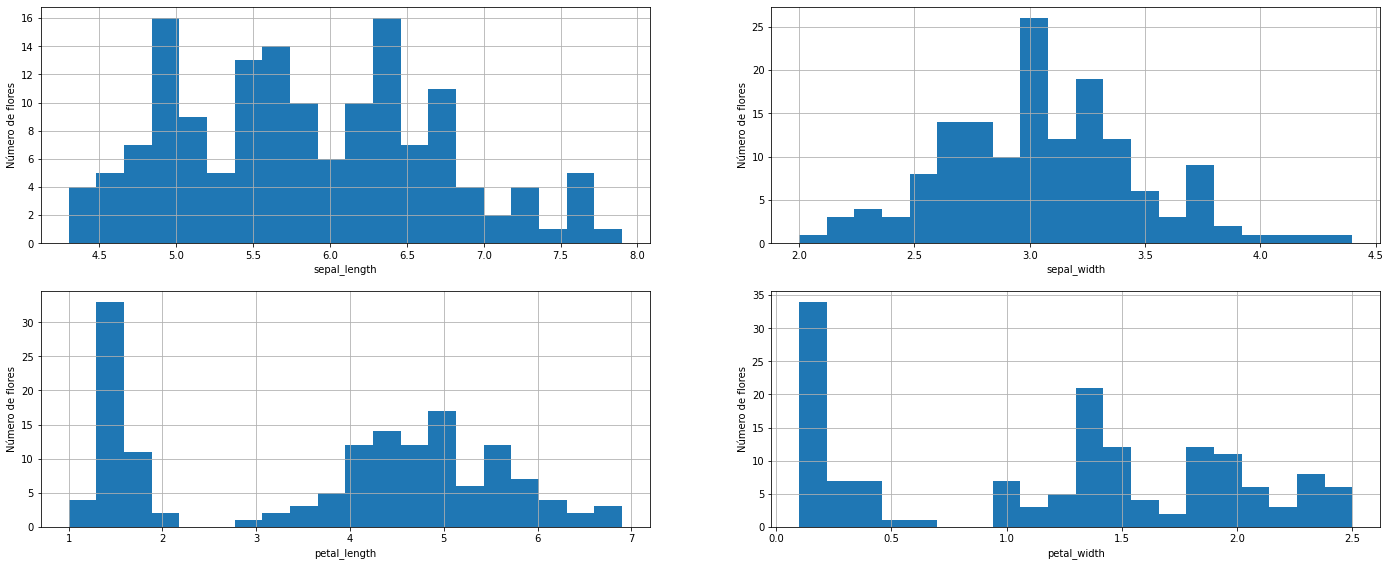

In [15]:
#Histograma para verificar la distribución
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dtflowers['sepal_length'].hist(bins=20)
fig.set_xlabel('sepal_length')
fig.set_ylabel('Número de flores')


plt.subplot(4, 2, 2)
fig = dtflowers['sepal_width'].hist(bins=20)
fig.set_xlabel('sepal_width')
fig.set_ylabel('Número de flores')


plt.subplot(4, 2, 3)
fig = dtflowers['petal_length'].hist(bins=20)
fig.set_xlabel('petal_length')
fig.set_ylabel('Número de flores')



plt.subplot(4, 2, 4)
fig = dtflowers['petal_width'].hist(bins=20)
fig.set_xlabel('petal_width')
fig.set_ylabel('Número de flores')


In [16]:
#Se crean unos dataframe temporales de acuerdo a cada especie para visualizarlo en un diagrama de dispersión
df0=dtflowers[dtflowers.target_class=='0']
df1=dtflowers[dtflowers.target_class=='1']
df2=dtflowers[dtflowers.target_class=='2']


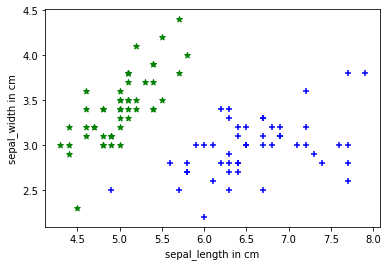

In [17]:
#Visualización del diagrama de dispersión
plt.xlabel('sepal_length in cm')
plt.ylabel('sepal_width in cm')
plt.scatter(df0['sepal_length'],df0['sepal_width'], color='green',marker='*')
plt.scatter(df1['sepal_length'],df1['sepal_width'], color='blue',marker='+')
#plt.scatter(df0['petal_length'],df0['petal_length'], color='green',marker='*')
#plt.scatter(df1['petal_width'],df1['petal_width'], color='blue',marker='+')


In [18]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dtflowers.drop('target_class', axis='columns')
mytarget_y=dtflowers['target_class']

In [19]:
#Variables independientes
inputs_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
#Se viualiza la variable dependiente
mytarget_y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target_class, Length: 150, dtype: object

In [21]:
#A continuación se introducirán los datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_X, mytarget_y, test_size = 0.2, random_state = 10)

In [22]:
#Visualiza los datos de entrenamiento y el número de variables involucradas 
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [23]:
#Permite conocer cuantas variables se van a utilizar
cols=inputs_X.columns

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [25]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])


In [26]:
#Se define a los datos de prueba el número de columnas del dataframe que corresponden a las variables independientes
X_test = pd.DataFrame(X_test, columns=[cols])

In [27]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.139829e-15,-1.073216e-15,1.776357e-16,-3.108624e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.873478e+00,-2.020670e+00,-1.565099e+00,-1.445568e+00
25%,-9.188396e-01,-6.244298e-01,-1.227511e+00,-1.186853e+00
50%,-8.353087e-02,-1.590163e-01,3.197717e-01,1.067198e-01
75%,7.517778e-01,5.391040e-01,7.417577e-01,7.535062e-01
max,2.422395e+00,3.098878e+00,1.754524e+00,1.659007e+00


In [28]:

# Se importa el clasificador SVC
from sklearn.svm import SVC


# Se importan las metricas para calcular la precisión
from sklearn.metrics import accuracy_score


#Se instancia el clasificador con hypermarametros por defecto
svc=SVC() 


#Al clasificador se fijan los datos de entrenamiento
svc.fit(X_train,y_train)


# Se hacen las predicciones sobre los datos de prueba
y_pred=svc.predict(X_test)


# compute and print accuracy score
# Se visualiza el computo y la precisión del puntaje
print('Puntuación de precisión del modelo con hiperparámetros predeterminados: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con hiperparámetros predeterminados: 0.9667


In [29]:
# instanciación con clasificador con kernel rbf y C=100
svc=SVC(C=100.0) 

# Se se establece los datos de entrenamiento
svc.fit(X_train,y_train)

# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=svc.predict(X_test)

# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel rbf y C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel rbf y C=100.0 : 0.9333


In [30]:
# instanciación con clasificador con kernel rbf y C=1000
svc=SVC(C=1000.0) 


# Se se establece los datos de entrenamiento
svc.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=svc.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel rbf y C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel rbf y C=1000.0 : 0.9667


In [31]:
# se instancia un clasificador con kernel lineal y C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# Se se establece los datos de entrenamiento
linear_svc.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred_test=linear_svc.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Puntuación de precisión del modelo con kernel lineal y C=1.0: 0.9667


In [32]:
# se instancia un clasificador con kernel lineal y C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# Se se establece los datos de entrenamiento
linear_svc100.fit(X_train, y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=linear_svc100.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=100.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel lineal y C=100.0: 1.0000


In [33]:
# se instancia un clasificador con kernel lineal y C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# Se se establece los datos de entrenamiento
linear_svc1000.fit(X_train, y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=linear_svc1000.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión del modelo con kernel lineal y C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión del modelo con kernel lineal y C=1000.0: 1.0000


In [34]:
#Se visuarlizarán los datos de entrenamiento
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array(['2', '2', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '2',
       '0', '2', '0', '2', '1', '1', '1', '1', '1', '2', '2', '2', '0',
       '0', '2', '0', '1', '0', '0', '1', '2', '1', '0', '1', '0', '2',
       '1', '0', '1', '1', '1', '1', '1', '0', '2', '1', '2', '0', '1',
       '2', '2', '0', '0', '0', '2', '1', '1', '2', '0', '0', '0', '1',
       '1', '2', '2', '1', '1', '1', '1', '2', '0', '0', '2', '0', '0',
       '1', '2', '0', '0', '0', '2', '0', '2', '0', '2', '1', '0', '2',
       '2', '1', '0', '1', '0', '2', '1', '1', '1', '0', '2', '1', '1',
       '2', '2', '1', '0', '1', '0', '0', '2', '0', '1', '1', '1', '2',
       '0', '1', '0'], dtype=object)

In [35]:
print('Puntuación de precisión del conjunto de entrenamiento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Puntuación de precisión del conjunto de entrenamiento: 0.9667


In [36]:
# se imprime las puntuaciones en el conjunto de entrenamiento y prueba
print('Puntuación de datos de entrenamiento: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Puntuación de datos de prueba: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Puntuación de datos de entrenamiento: 0.9667
Puntuación de datos de prueba: 0.9667


In [37]:
#Se comprueba  la distribución de clase en conjunto de datos de prueba
y_test.value_counts()

2    13
0    10
1     7
Name: target_class, dtype: int64

In [38]:
# Se instancia el clasificador con kernel polinomial y c = 1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# Se se establece los datos de entrenamiento
poly_svc.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=poly_svc.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión modelo con kernel polinomial y c = 1.0: {0: 0.4F}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión modelo con kernel polinomial y c = 1.0:  0.9667


In [39]:
# Se instancia el clasificador con kernel polinomial y c = 100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# Se se establece los datos de entrenamiento
poly_svc100.fit(X_train, y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=poly_svc100.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión modelo con kernel polinomial y c = 1.0: {0: 0.4F}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión modelo con kernel polinomial y c = 1.0:  1.0000


In [40]:
#Instancia del clasificador con kernel sigmoid y c = 1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# Se se establece los datos de entrenamiento
sigmoid_svc.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=sigmoid_svc.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión modelo con kernel sigmoideo y c = 1.0: {0: 0.4F}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión modelo con kernel sigmoideo y c = 1.0:  0.9000


In [44]:
#Instancia del clasificador con kernel sigmoid y c = 100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# Se se establece los datos de entrenamiento
sigmoid_svc100.fit(X_train,y_train)


# Se hace la predicción sobre el conjunto de datos de prueba
y_pred=sigmoid_svc100.predict(X_test)


# Se imprime el puntaje de precisión de computo
print('Puntuación de precisión modelo con kernel sigmoideo y c = 1.0: {0: 0.4F}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión modelo con kernel sigmoideo y c = 1.0:  0.9000


In [216]:
#Se vizualizará la matriz de confusión
y_prediccion = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
mconf= confusion_matrix(y_test,y_prediccion)
mconf

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 12]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

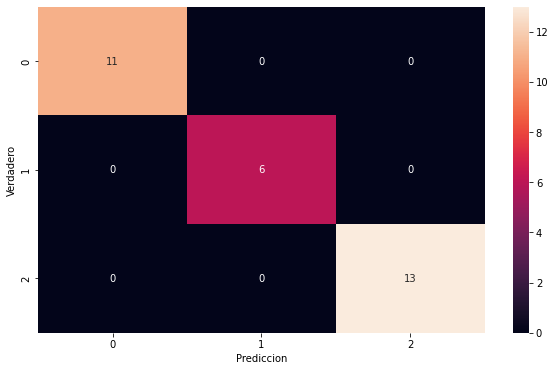

In [217]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [193]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

